
First few rows of the DataFrame:
 id  period  treatment  x1        x2  x3       x4  age    age_s  outcome  censored  eligible  cluster
  1       0          1   1  1.146148   0 0.734203   36 0.083333        0         0         1        2
  1       1          1   1  0.002200   0 0.734203   37 0.166667        0         0         0        2
  1       2          1   0 -0.481762   0 0.734203   38 0.250000        0         0         0        2
  1       3          1   0  0.007872   0 0.734203   39 0.333333        0         0         0        2
  1       4          1   1  0.216054   0 0.734203   40 0.416667        0         0         0        2

Summary Statistics:
               id      period   treatment          x1          x2          x3          x4         age       age_s     outcome   censored    eligible     cluster
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000  725.00000  725.000000  725.000000
mean    49.

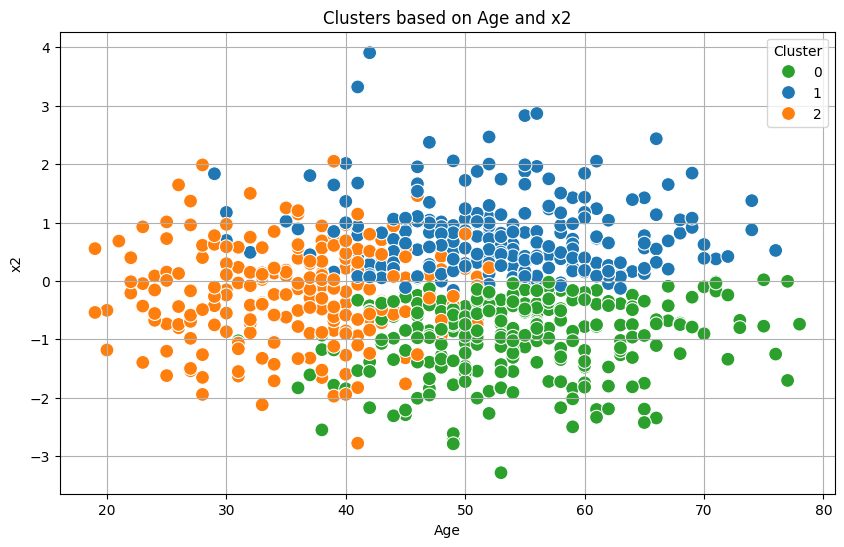

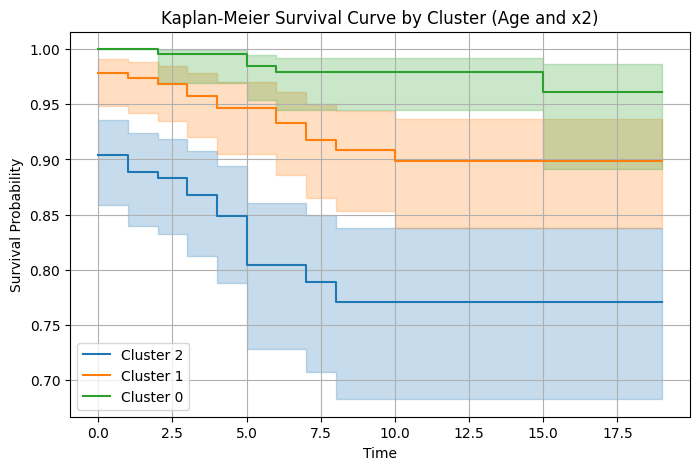


### Insights ###
1. Data Loading and Preprocessing:
   - The dataset 'data_censored.csv' is loaded into a DataFrame 'df'.
   - The columns 'period' and 'censored' are converted to numeric types to ensure proper handling of data.
   - Relevant baseline characteristics ('age', 'x2', 'x4') are selected for clustering.
   - Missing values in the selected features are handled by dropping rows with missing values.
   - The features are standardized using 'StandardScaler' to ensure they have a mean of 0 and a standard deviation of 1.

2. Clustering:
   - K-Means clustering is applied to the standardized features to create 3 clusters.
   - The resulting cluster labels are added to the DataFrame as a new column 'cluster'.

3. Visualization:
   - A scatter plot is created to visualize the clusters based on 'age' and 'x2'.
   - The clusters are colored using a custom palette (green, blue, orange) and the circles are made larger for better visibility.
   - Kaplan-Meier survival analysis is perfor

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Load dataset
df = pd.read_csv("data_censored.csv")

# Define column names (ensure these match your dataset!)
duration_col = "period"  # Replace with actual time column name
event_col = "censored"   # Replace with actual event column (1=event occurred, 0=censored)

# Check column names
if duration_col not in df.columns or event_col not in df.columns:
    raise ValueError(f"ERROR: Column names are incorrect! Check: {df.columns}")

# Convert to numeric (if necessary)
df[duration_col] = pd.to_numeric(df[duration_col], errors="coerce")
df[event_col] = pd.to_numeric(df[event_col], errors="coerce")

# Select relevant baseline characteristics for clustering
features = df[['age', 'x2', 'x4']]

# Handle missing values
features = features.dropna()

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering (choosing 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Insights and Tables
print("\nFirst few rows of the DataFrame:")
print(df.head().to_string(index=False))

print("\nSummary Statistics:")
print(df.describe().to_string())

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['x2'], hue=df['cluster'], palette=['#2ca02c', '#1f77b4', '#ff7f0e'], s=100)
plt.title("Clusters based on Age and x2")
plt.xlabel("Age")
plt.ylabel("x2")
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Kaplan-Meier Survival Analysis by Cluster for age and x2
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 5))
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    kmf.fit(cluster_data[duration_col], event_observed=cluster_data[event_col], label=f'Cluster {cluster}')
    kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curve by Cluster (Age and x2)")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid()
plt.show()

# Insights
print("\n### Insights ###")
print("1. Data Loading and Preprocessing:")
print("   - The dataset 'data_censored.csv' is loaded into a DataFrame 'df'.")
print("   - The columns 'period' and 'censored' are converted to numeric types to ensure proper handling of data.")
print("   - Relevant baseline characteristics ('age', 'x2', 'x4') are selected for clustering.")
print("   - Missing values in the selected features are handled by dropping rows with missing values.")
print("   - The features are standardized using 'StandardScaler' to ensure they have a mean of 0 and a standard deviation of 1.")

print("\n2. Clustering:")
print("   - K-Means clustering is applied to the standardized features to create 3 clusters.")
print("   - The resulting cluster labels are added to the DataFrame as a new column 'cluster'.")

print("\n3. Visualization:")
print("   - A scatter plot is created to visualize the clusters based on 'age' and 'x2'.")
print("   - The clusters are colored using a custom palette (green, blue, orange) and the circles are made larger for better visibility.")
print("   - Kaplan-Meier survival analysis is performed for each cluster to visualize the survival probability over time.")

# Tables
print("\n### Tables ###")

print("\n#### Table 1: First Few Rows of the DataFrame ####")
print(df.head().to_string(index=False))

print("\n#### Table 2: Summary Statistics ####")
print(df.describe().to_string())